In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler

In [2]:
listing=pd.read_csv('listings.csv')

In [3]:
print(listing.shape)
listing.head()

(86358, 16)


id                                               name  host_id  \
0  13913                Holiday London DB Room Let-on going    54730   
1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3  17506  Boutique Chelsea/Fulham Double bed 5-star ensuite    67915   
4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

   host_name  neighbourhood_group           neighbourhood  latitude  \
0      Alina                  NaN               Islington  51.56802   
1   Philippa                  NaN  Kensington and Chelsea  51.48796   
2        Liz                  NaN             Westminster  51.52195   
3  Charlotte                  NaN  Hammersmith and Fulham  51.47935   
4     Amanda                  NaN              Wandsworth  51.44687   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -0.11121     Private room     65               1                 21   
1   -0.16898  Entire home/apt    100              10                 89   
2   -0.14094  Entire home/apt    300               3                 42   
3   -0.19743     Private room    150               3                  0   
4   -0.21874  Entire home/apt     65              21                 35   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2020-02-22               0.18                               2   
1  2020-03-16               0.71                               1   
2  2019-11-02               0.38                              15   
3         NaN                NaN                               2   
4  2020-03-30               0.70                               1   

   availability_365  
0               359  
1               232  
2               307  
3               362  
4                15

In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86358 entries, 0 to 86357
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              86358 non-null  int64  
 1   name                            86334 non-null  object 
 2   host_id                         86358 non-null  int64  
 3   host_name                       86348 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   86358 non-null  object 
 6   latitude                        86358 non-null  float64
 7   longitude                       86358 non-null  float64
 8   room_type                       86358 non-null  object 
 9   price                           86358 non-null  int64  
 10  minimum_nights                  86358 non-null  int64  
 11  number_of_reviews               86358 non-null  int64  
 12  last_review                     

In [5]:
listing.drop_duplicates(subset=None, keep="first", inplace=True)
print(listing.shape)
listing.isnull().sum()

(86358, 16)


id                                    0
name                                 24
host_id                               0
host_name                            10
neighbourhood_group               86358
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       21516
reviews_per_month                 21516
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
listing=listing.drop(['neighbourhood_group'],axis=1)
listing.head()

id                                               name  host_id  \
0  13913                Holiday London DB Room Let-on going    54730   
1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3  17506  Boutique Chelsea/Fulham Double bed 5-star ensuite    67915   
4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

   host_name           neighbourhood  latitude  longitude        room_type  \
0      Alina               Islington  51.56802   -0.11121     Private room   
1   Philippa  Kensington and Chelsea  51.48796   -0.16898  Entire home/apt   
2        Liz             Westminster  51.52195   -0.14094  Entire home/apt   
3  Charlotte  Hammersmith and Fulham  51.47935   -0.19743     Private room   
4     Amanda              Wandsworth  51.44687   -0.21874  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     65               1                 21  2020-02-22               0.18   
1    100              10                 89  2020-03-16               0.71   
2    300               3                 42  2019-11-02               0.38   
3    150               3                  0         NaN                NaN   
4     65              21                 35  2020-03-30               0.70   

   calculated_host_listings_count  availability_365  
0                               2               359  
1                               1               232  
2                              15               307  
3                               2               362  
4                               1                15

In [7]:
print("Number of Neighbourhood:")
print(len(listing["neighbourhood"].unique()))


print("")
print("Average Price:")
print(round(listing.price.mean(),2))


print("")
print("Maximum Price:")
print(round(listing.price.max(),2))


print("")
print("Minimum Price:")
print(round(listing.price.min(),2))


print("")
print("Number of 0 (Zero) Price:")
print(len(listing[listing["price"]==0]))

print("")
print("Average Number of Reviews:")
print(round(listing.number_of_reviews.mean(),2))
print("")
print("Number of 0 (Zero) Price:")
print(len(listing[listing["number_of_reviews"]==0]))

Number of Neighbourhood:
33

Average Price:
129.61

Maximum Price:
19985

Minimum Price:
0

Number of 0 (Zero) Price:
19

Average Number of Reviews:
17.53

Number of 0 (Zero) Price:
21516


In [8]:
def groups(df,cname,rename,rn=0,p=0):
    dummy_df=df.groupby(cname).id.count().sort_values(ascending=False)
    dummy_df = dummy_df.reset_index()
    if(rn):
        dummy_df.rename(columns={rename[0]:rename[1]}, inplace=True)
    if(p):
        dummy_df["percentage"]=round(dummy_df["count"] / dummy_df["count"].sum()*100,2)
    return dummy_df
def plotdata(df,X,Y):
    plt.figure(figsize=(15,10),dpi=200),
    plt.style.use('default')
    ax = sns.barplot(x=X, y=Y, data=df)
    plt.title("Disturibution", weight="bold", c="red", fontsize=15)
    plt.xlabel("",weight="bold",c="k")
    plt.xticks(rotation=90, weight="bold")
    plt.ylabel(Y,weight= "bold",c="k")
    plt.yticks(weight="bold")
    for p in ax.patches:
            ax.annotate('{:.5f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                        ha='center', va='bottom',weight="bold",
                        color= 'black')
    plt.show()

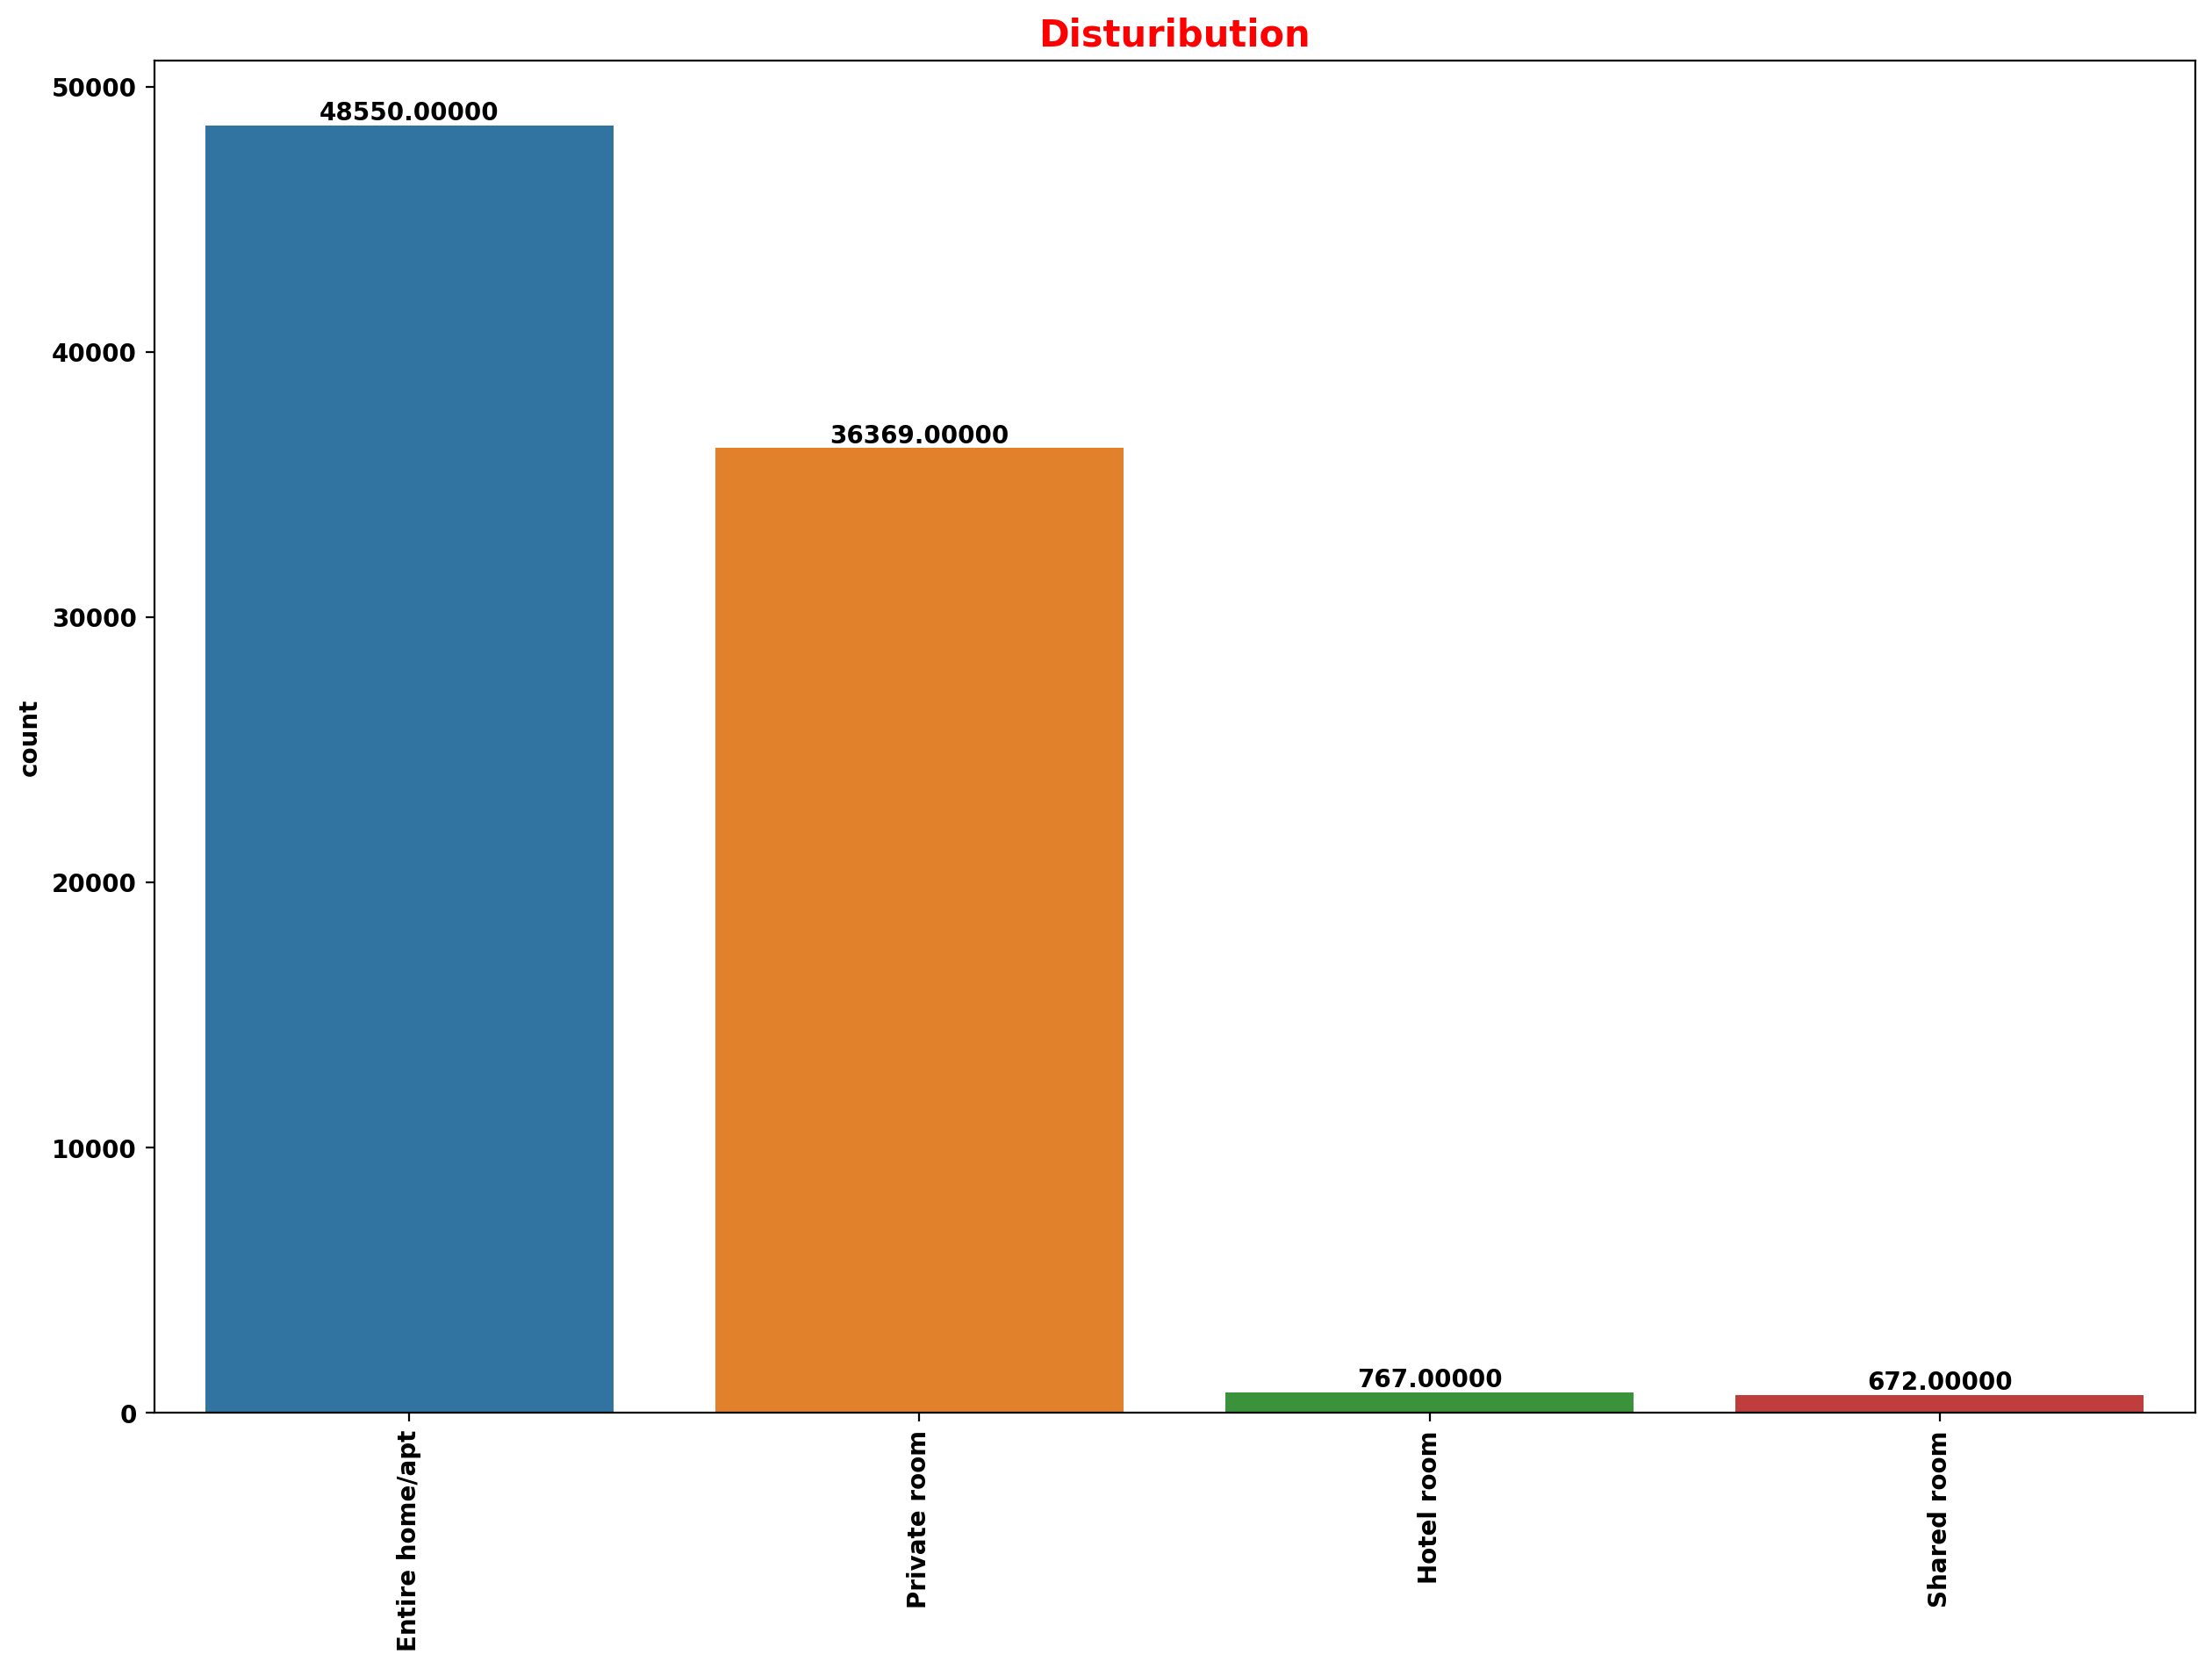

In [9]:
room_data=groups(listing,'room_type',['id','count'],1,1)
plotdata(room_data,'room_type','count')

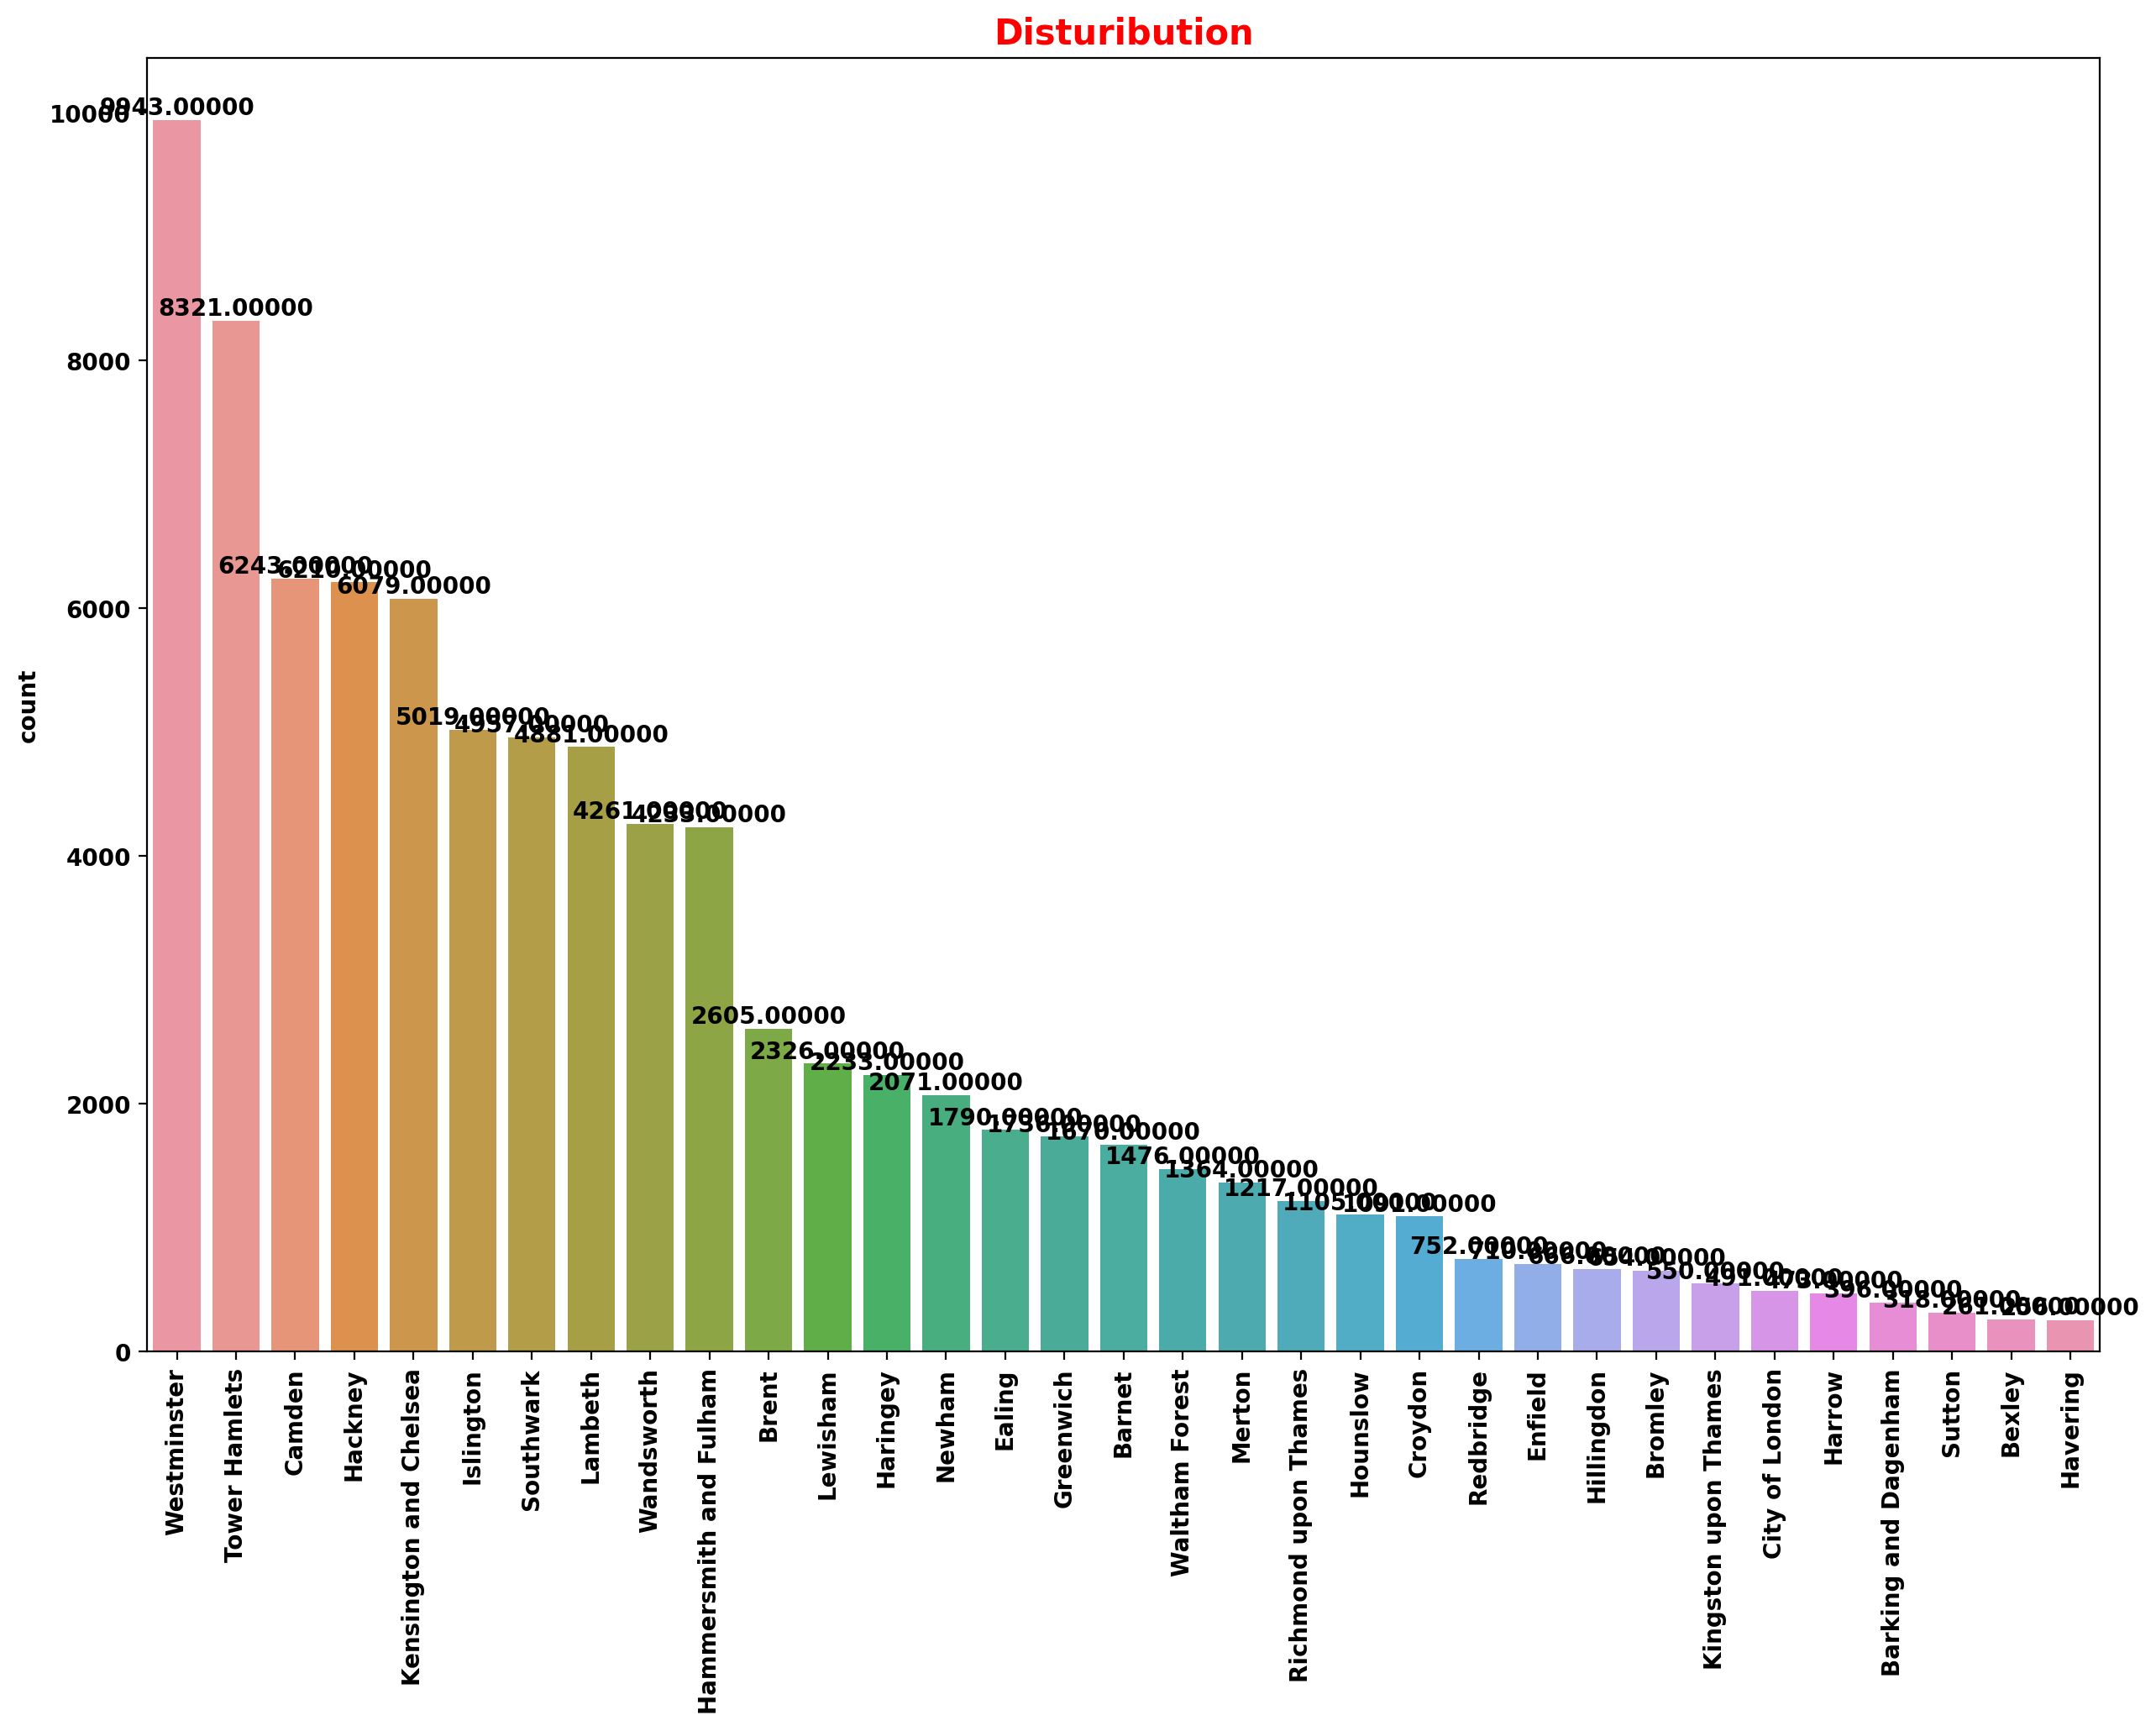

In [10]:
neighnourhood_data=groups(listing,'neighbourhood',['id','count'],1,1)
plotdata(neighnourhood_data,'neighbourhood','count')

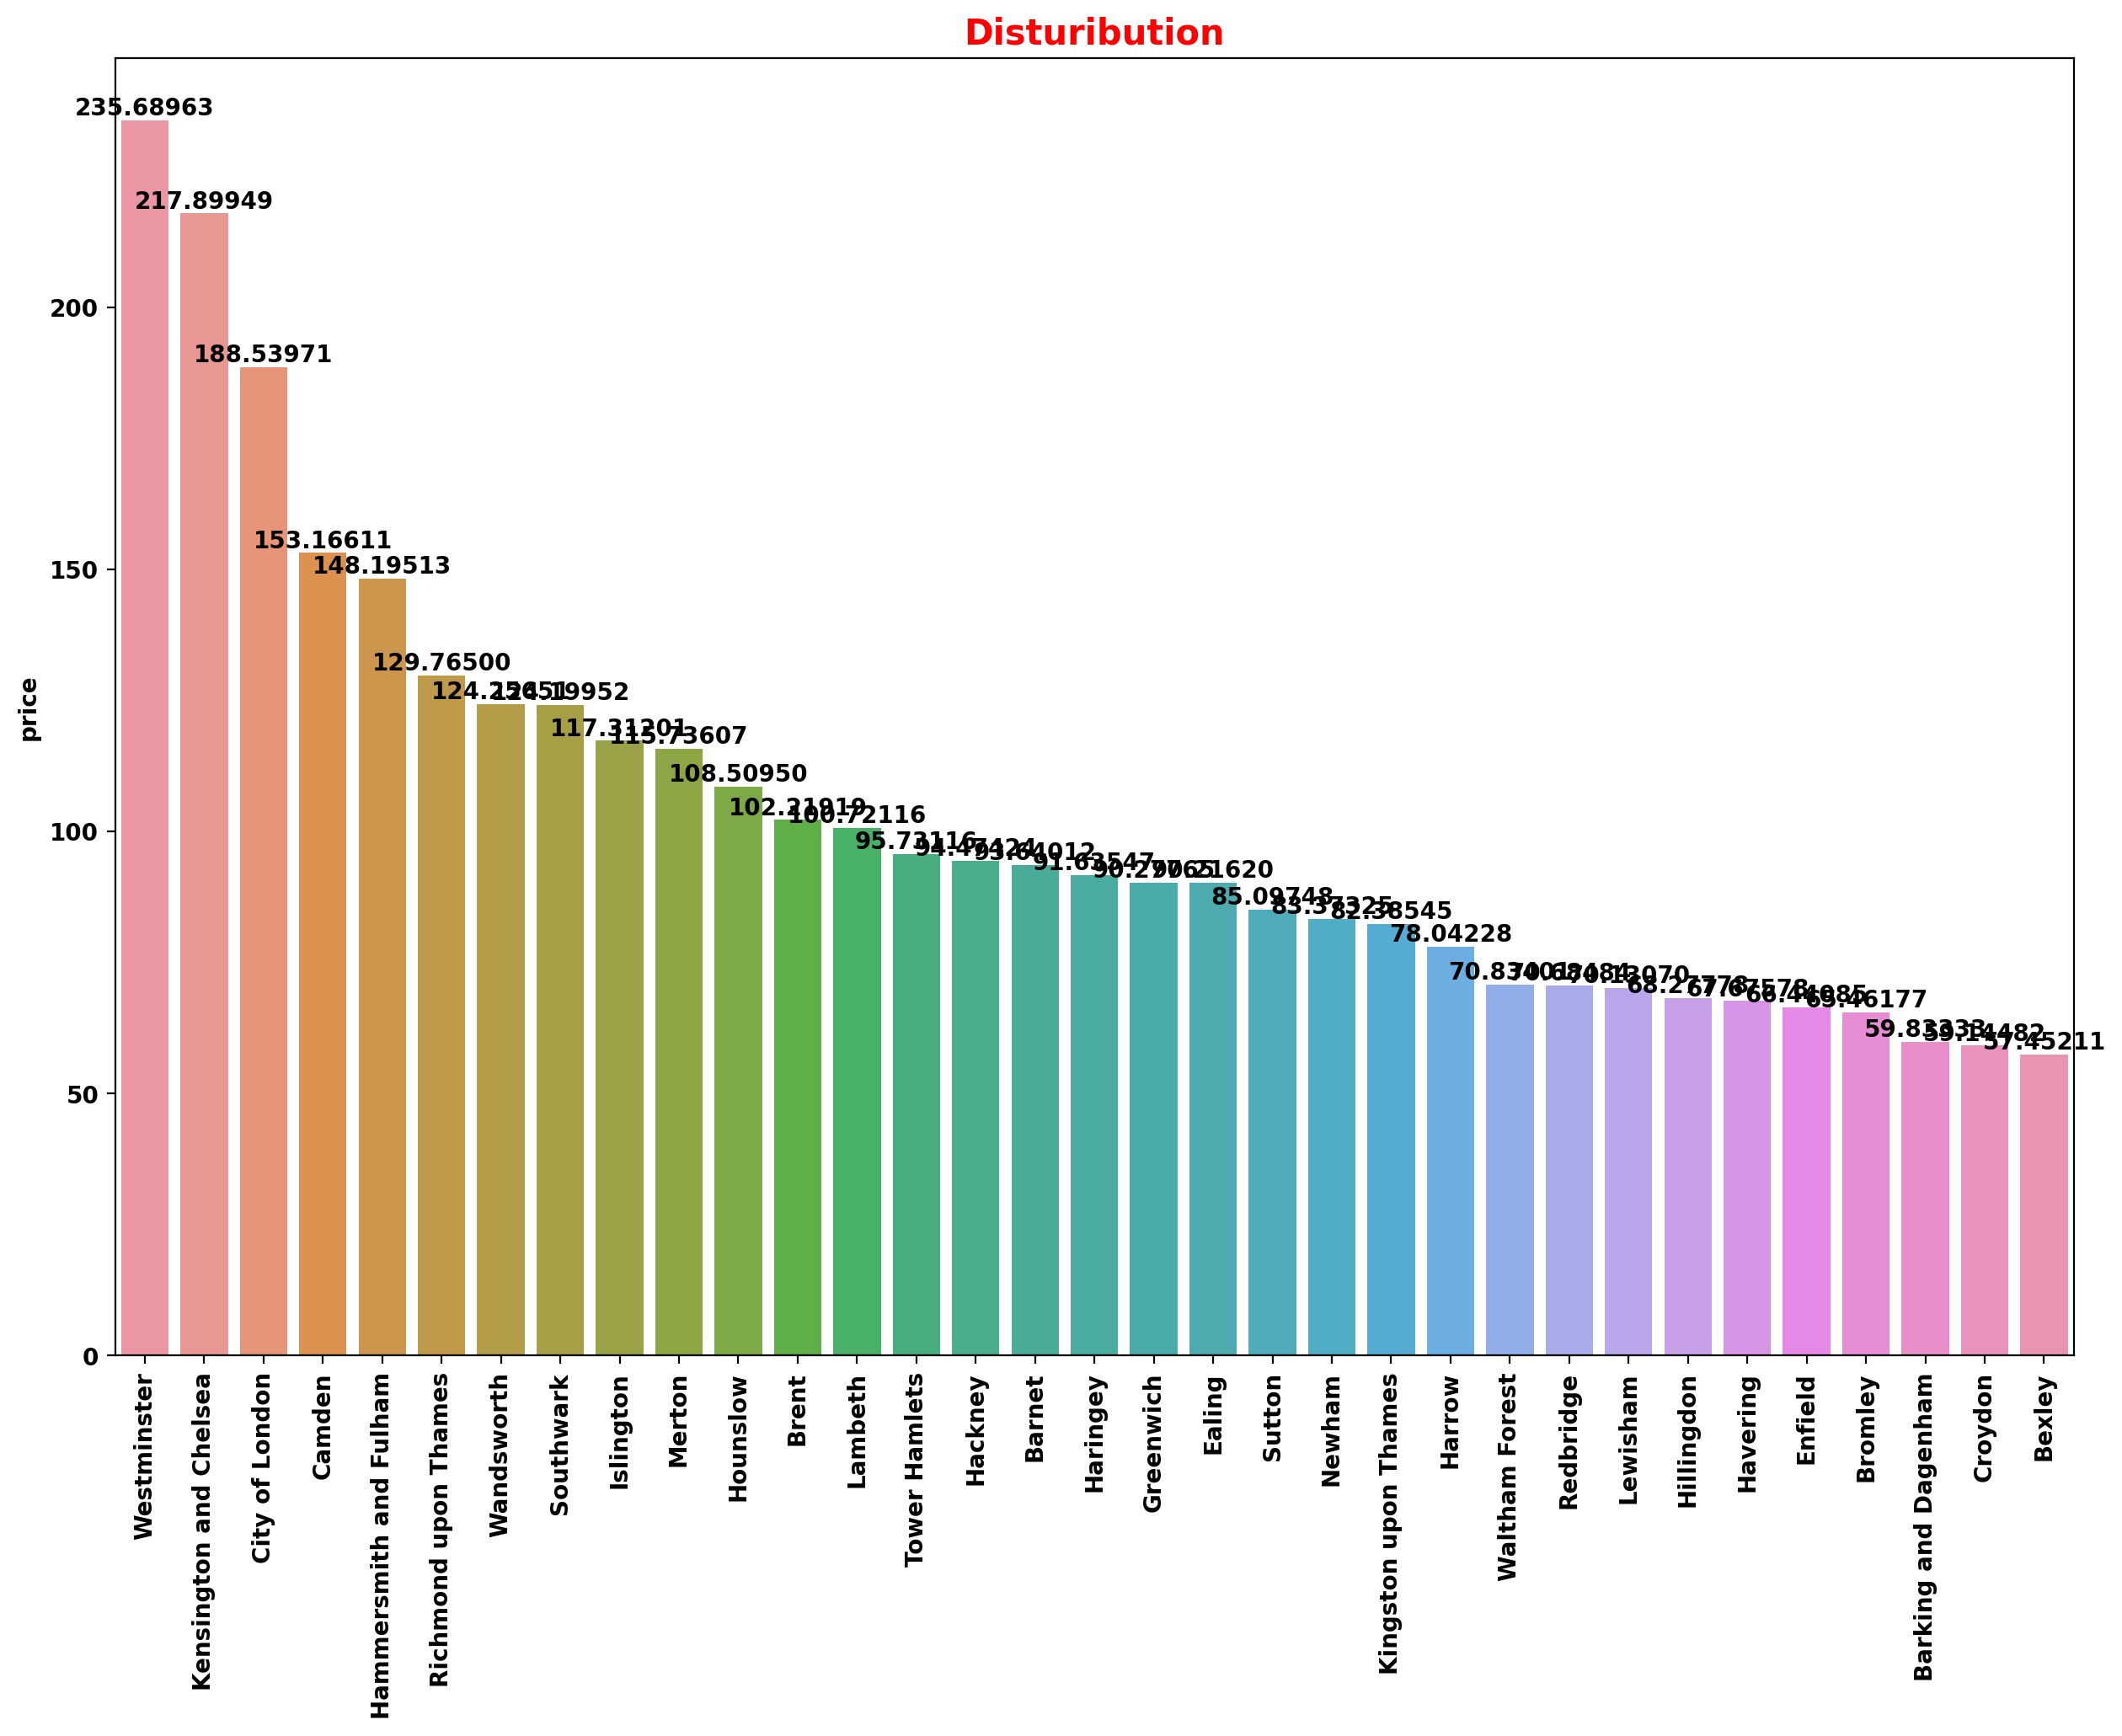

In [11]:
neigh_price = listing.groupby("neighbourhood").price.mean().sort_values(ascending=False)
neigh_price = neigh_price.reset_index()
plotdata(neigh_price,'neighbourhood','price')

In [12]:
neigh_review = listing.groupby("neighbourhood").number_of_reviews.sum().sort_values(ascending=False)
neigh_review = neigh_review.reset_index()
neigh_review

neighbourhood  number_of_reviews
0              Westminster             184094
1            Tower Hamlets             154988
2                   Camden             140347
3                  Lambeth             112999
4                Southwark             103721
5   Kensington and Chelsea             101941
6                Islington              94130
7                  Hackney              89914
8   Hammersmith and Fulham              78754
9               Wandsworth              63310
10                   Brent              48050
11                Haringey              35057
12                  Newham              33106
13                Lewisham              33094
14                  Ealing              31502
15               Greenwich              26295
16    Richmond upon Thames              23209
17                  Barnet              19853
18                Hounslow              19621
19          Waltham Forest              18684
20                  Merton              14733
21              Hillingdon              13721
22                 Croydon              12318
23          City of London               8987
24               Redbridge               8964
25    Kingston upon Thames               8206
26                 Bromley               7887
27                 Enfield               7818
28                  Harrow               6230
29                  Sutton               4784
30    Barking and Dagenham               3208
31                Havering               2438
32                  Bexley               2003

In [13]:
property_type_borough = listing.groupby(["neighbourhood","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("neighbourhood","room_type","id")
property_type_borough
# property_type_borough['total']=property_type_borough['Entire home/apt']+property_type_borough['Private room']+property_type_borough['Shared room']+property_type_borough['Hotel room']

C:\Users\cheri\AppData\Local\Temp/ipykernel_20656/1349389935.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  property_type_borough = property_type_borough.pivot("neighbourhood","room_type","id")


room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                                 
Barking and Dagenham              110.0         3.0         279.0          4.0
Barnet                            719.0        32.0         905.0         14.0
Bexley                             76.0         2.0         180.0          3.0
Brent                            1227.0        20.0        1323.0         35.0
Bromley                           239.0        15.0         394.0          6.0
Camden                           4125.0        98.0        1977.0         43.0
City of London                    428.0         4.0          57.0          2.0
Croydon                           394.0        14.0         672.0         11.0
Ealing                            705.0        27.0        1045.0         13.0
Enfield                           233.0        25.0         447.0          5.0
Greenwich                         829.0        11.0         883.0         13.0
Hackney                          3382.0        13.0        2786.0         29.0
Hammersmith and Fulham           2786.0        32.0        1392.0         23.0
Haringey                          991.0         3.0        1214.0         25.0
Harrow                            163.0         NaN         302.0          8.0
Havering                           97.0         NaN         157.0          2.0
Hillingdon                        215.0         7.0         440.0          4.0
Hounslow                          505.0         4.0         587.0          9.0
Islington                        3124.0        38.0        1836.0         21.0
Kensington and Chelsea           4853.0       182.0         988.0         56.0
Kingston upon Thames              234.0         NaN         313.0          3.0
Lambeth                          2516.0        14.0        2306.0         45.0
Lewisham                          975.0         NaN        1317.0         34.0
Merton                            604.0         1.0         745.0         14.0
Newham                            802.0         7.0        1232.0         30.0
Redbridge                         243.0         NaN         500.0          9.0
Richmond upon Thames              684.0         5.0         524.0          4.0
Southwark                        2694.0        16.0        2201.0         46.0
Sutton                             97.0         NaN         219.0          2.0
Tower Hamlets                    4067.0        40.0        4153.0         61.0
Waltham Forest                    669.0         5.0         786.0         16.0
Wandsworth                       2375.0        36.0        1838.0         12.0
Westminster                      7389.0       113.0        2371.0         70.0

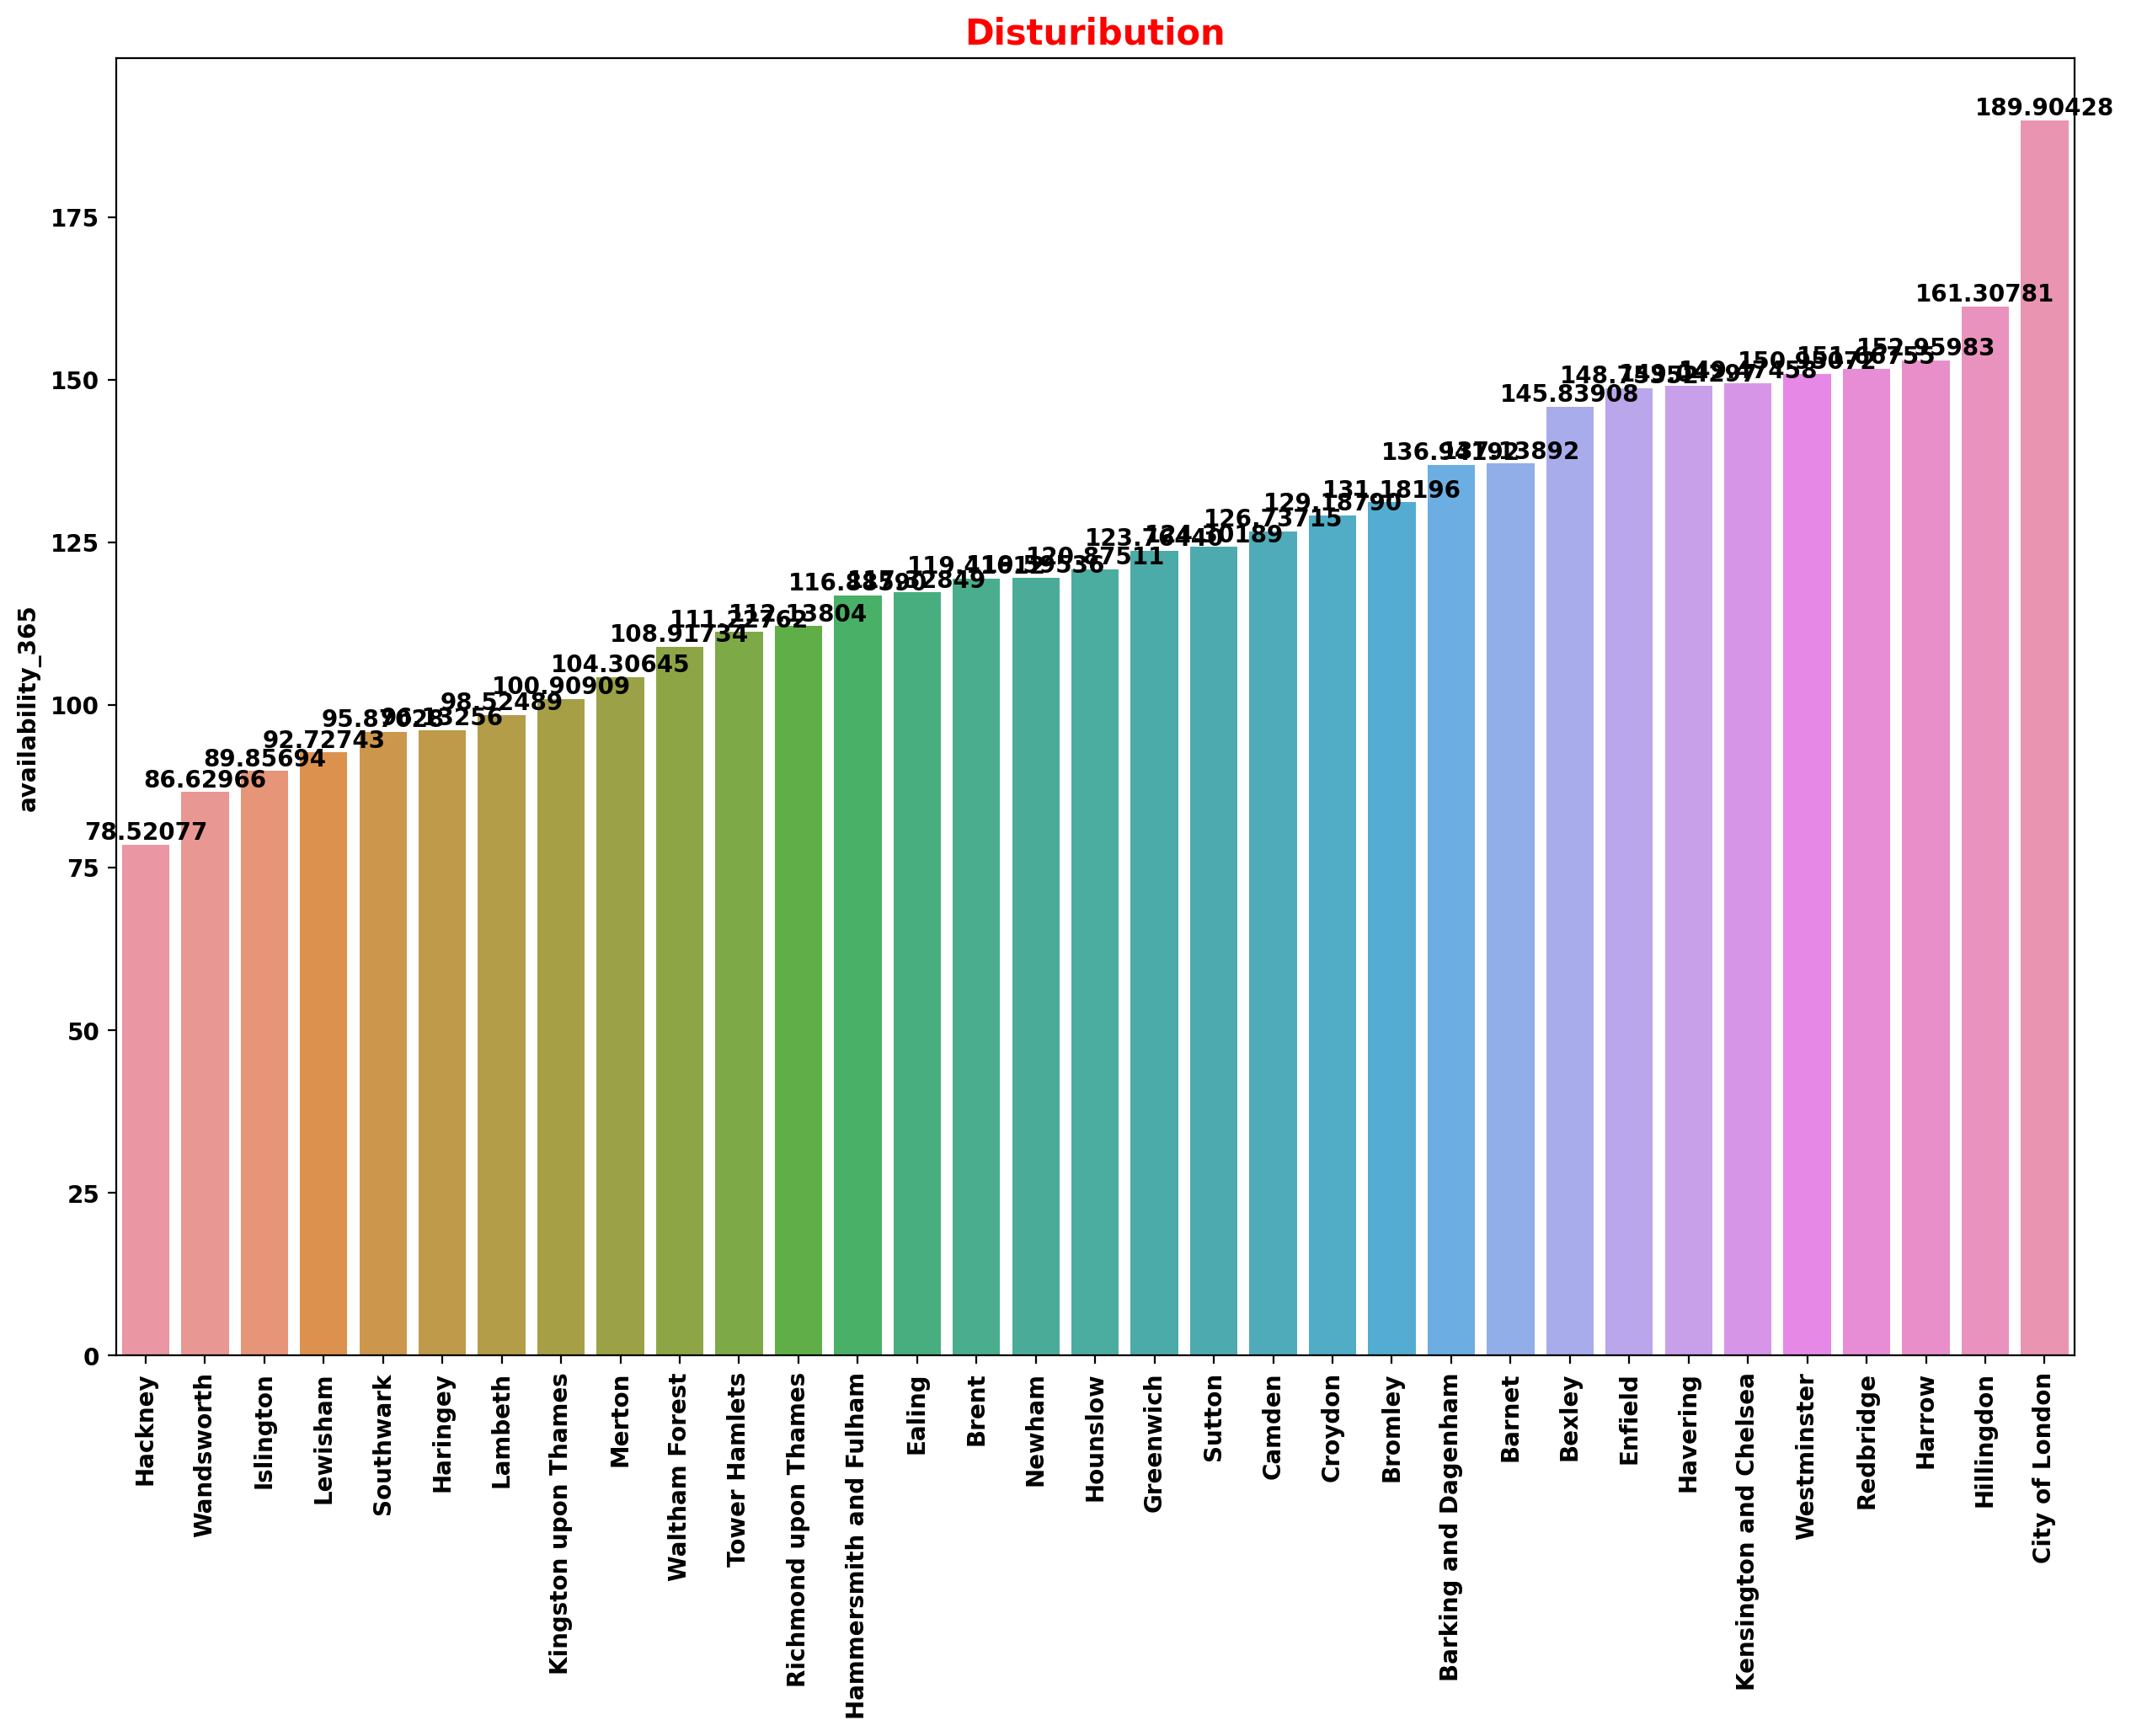

In [14]:
occupancy_borough = listing.groupby("neighbourhood").availability_365.mean().sort_values().reset_index()

plotdata(occupancy_borough,"neighbourhood",'availability_365')

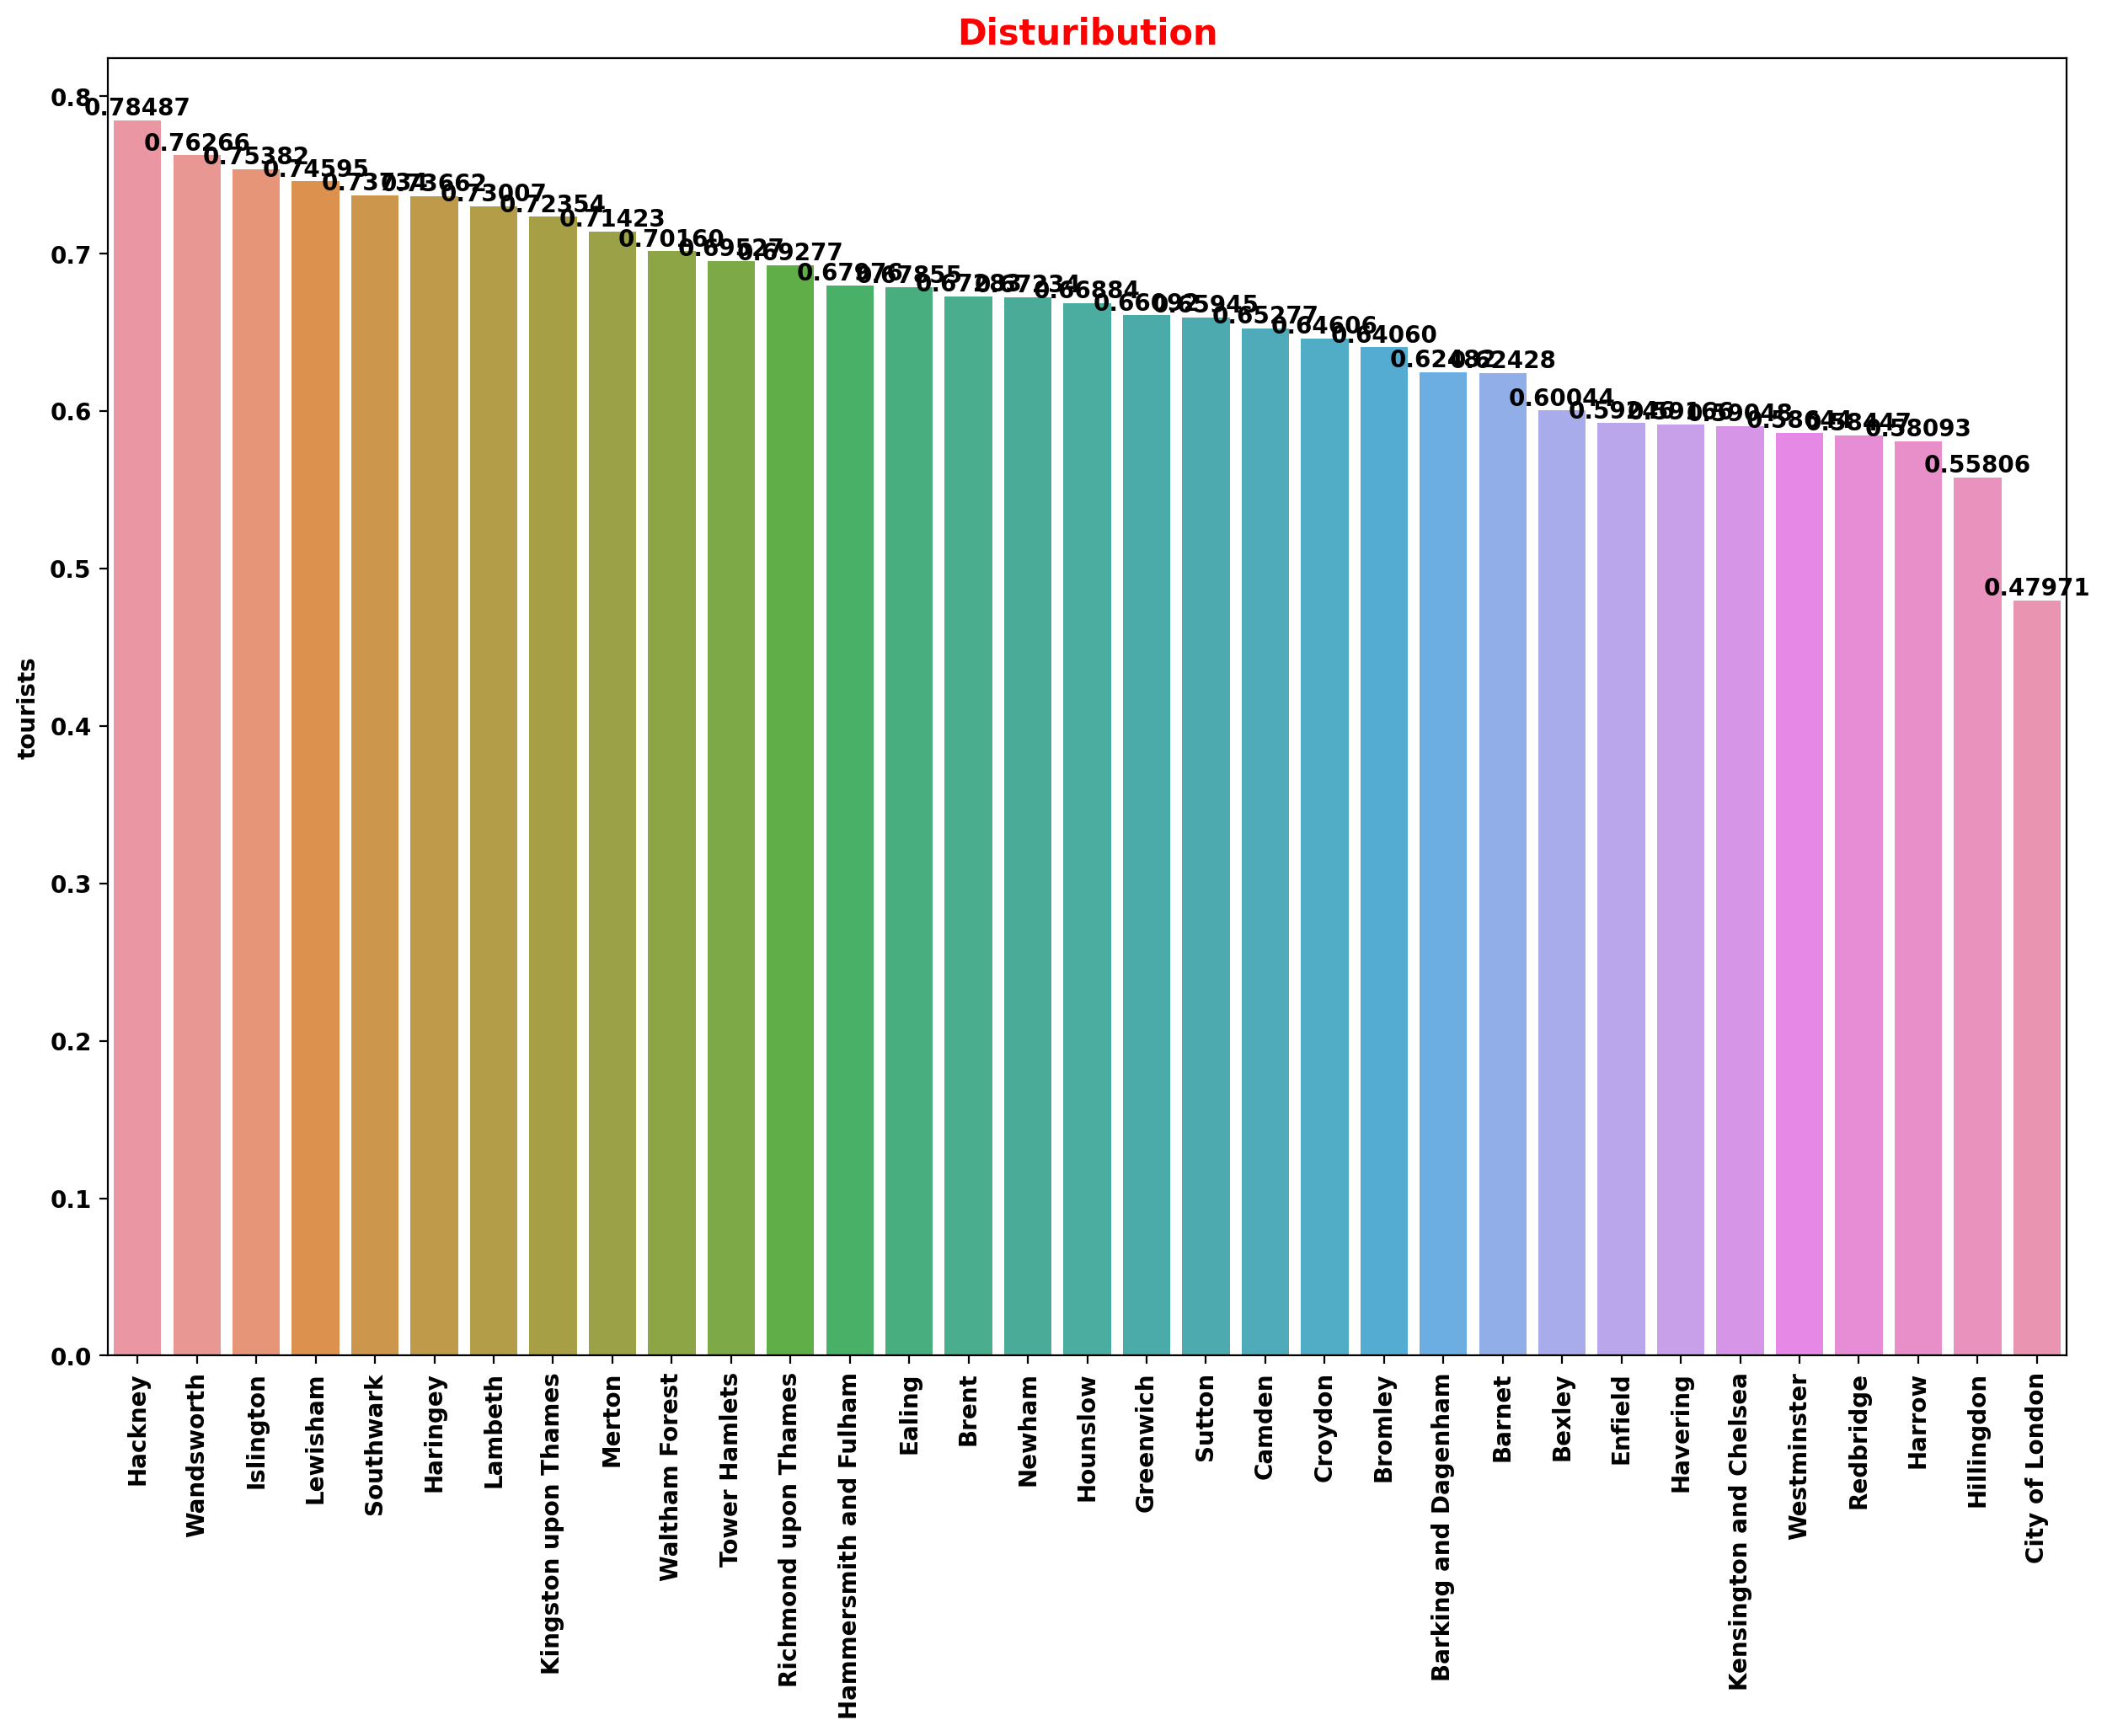

In [15]:
occupancy_borough['tourists']=1-occupancy_borough.availability_365/365
plotdata(occupancy_borough,"neighbourhood",'tourists')

In [16]:
red_df=listing.groupby("neighbourhood").mean()
red_df = red_df[["price","minimum_nights","reviews_per_month"]].reset_index()
red_df['est_night/year']=365-occupancy_borough['availability_365']
red_df['annual income']=red_df['price']*red_df['est_night/year']
red_df

C:\Users\cheri\AppData\Local\Temp/ipykernel_20656/1671075656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  red_df=listing.groupby("neighbourhood").mean()


neighbourhood       price  minimum_nights  reviews_per_month  \
0     Barking and Dagenham   59.833333        4.209596           0.815333   
1                   Barnet   93.640120        6.036527           0.783509   
2                   Bexley   57.452107        3.597701           0.687674   
3                    Brent  102.219194        4.315547           0.980588   
4                  Bromley   65.461774        3.623853           0.734265   
5                   Camden  153.166106        4.961717           1.225736   
6           City of London  188.539715        5.443992           1.085699   
7                  Croydon   59.144821        4.901008           0.815528   
8                   Ealing   90.216201        5.057542           0.853052   
9                  Enfield   66.440845        3.142254           0.718583   
10               Greenwich   90.277650        3.509793           0.929092   
11                 Hackney   94.474235        4.616264           0.687380   
12  Hammersmith and Fulham  148.195133        3.659816           0.925697   
13                Haringey   91.635468        4.674429           0.820766   
14                  Harrow   78.042283        4.482030           0.772331   
15                Havering   67.675781        2.347656           0.794111   
16              Hillingdon   68.277778        8.584084           1.280166   
17                Hounslow  108.509502        4.047059           1.075601   
18               Islington  117.312014        3.876270           0.933580   
19  Kensington and Chelsea  217.899490        4.617700           0.935812   
20    Kingston upon Thames   82.385455        3.476364           0.887381   
21                 Lambeth  100.721164        3.853104           1.031477   
22                Lewisham   70.130696        3.976784           0.750017   
23                  Merton  115.736070        4.238270           0.655958   
24                  Newham   83.373250        4.462578           1.008840   
25               Redbridge   70.684840        3.913564           0.809822   
26    Richmond upon Thames  129.764996        4.295809           0.889351   
27               Southwark  124.199516        4.023200           1.052938   
28                  Sutton   85.097484        3.619497           0.875901   
29           Tower Hamlets   95.731162        4.839923           1.073308   
30          Waltham Forest   70.834011        3.863144           0.754229   
31              Wandsworth  124.256513        4.100915           0.801068   
32             Westminster  235.689631        5.128935           1.156714   

    est_night/year  annual income  
0       286.479227   17141.007085  
1       278.370336   26066.631564  
2       275.143056   15807.548393  
3       272.272571   27831.482711  
4       269.129716   17617.708536  
5       268.867443   41181.379270  
6       266.475108   50241.140799  
7       264.090909   15619.609616  
8       260.693548   23518.781591  
9       256.082656   17014.348061  
10      253.772383   22909.974325  
11      252.861956   23888.939845  
12      248.114103   36769.302681  
13      247.671508   22695.494576  
14      245.583877   19165.926515  
15      245.404635   16607.950426  
16      244.124887   16668.304776  
17      241.235599   26176.354784  
18      240.698113   28236.780510  
19      238.262854   51917.354470  
20      235.812099   19427.486963  
21      233.818043   23550.425365  
22      228.058081   15993.872044  
23      227.861078   26371.745743  
24      219.160920   18272.158056  
25      216.246479   15285.347852  
26      215.957031   28023.663273  
27      215.525415   26768.152239  
28      214.049281   18215.055316  
29      213.332447   20422.563051  
30      212.040169   15019.655639  
31      203.692192   25310.081437  
32      175.095723   41268.246329

In [17]:
listing.describe()

id       host_id      latitude     longitude         price  \
count  8.635800e+04  8.635800e+04  86358.000000  86358.000000  86358.000000   
mean   2.511516e+07  9.334733e+07     51.509916     -0.128245    129.610725   
std    1.238307e+07  9.543753e+07      0.046204      0.093286    289.484146   
min    1.391300e+04  4.775000e+03     51.294790     -0.510310      0.000000   
25%    1.553035e+07  1.636343e+07     51.485850     -0.188380     47.000000   
50%    2.573346e+07  5.013476e+07     51.514080     -0.126245     83.000000   
75%    3.654165e+07  1.522947e+08     51.537620     -0.069930    140.000000   
max    4.318679e+07  3.437914e+08     51.681690      0.284500  19985.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    86358.000000       86358.000000       64842.000000   
mean         4.474490          17.531277           0.963183   
std         19.151568          37.393948           1.177591   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.200000   
50%          2.000000           4.000000           0.560000   
75%          3.000000          17.000000           1.270000   
max       1125.000000         773.000000          22.690000   

       calculated_host_listings_count  availability_365  
count                    86358.000000      86358.000000  
mean                        20.987448        116.328898  
std                        100.232081        135.293902  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         63.000000  
75%                          5.000000        237.000000  
max                        928.000000        365.000000

In [18]:
listing1=listing[listing['price']>=35]
listing1=listing1[listing1['price']<=150]
listing1.describe()

id       host_id      latitude     longitude         price  \
count  5.834000e+04  5.834000e+04  58340.000000  58340.000000  58340.000000   
mean   2.461094e+07  8.986813e+07     51.510445     -0.127184     81.177837   
std    1.247225e+07  9.466238e+07      0.046304      0.092657     33.588778   
min    1.391300e+04  4.775000e+03     51.294790     -0.510310     35.000000   
25%    1.472324e+07  1.469620e+07     51.484690     -0.188720     50.000000   
50%    2.487720e+07  4.763690e+07     51.515070     -0.121260     77.000000   
75%    3.611519e+07  1.467172e+08     51.539073     -0.068670    103.000000   
max    4.318449e+07  3.437914e+08     51.681690      0.284500    150.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    58340.000000       58340.000000       45016.000000   
mean         4.278231          18.757353           0.979754   
std         18.904449          39.617195           1.193876   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.200000   
50%          2.000000           5.000000           0.570000   
75%          3.000000          19.000000           1.300000   
max       1125.000000         773.000000          22.690000   

       calculated_host_listings_count  availability_365  
count                    58340.000000      58340.000000  
mean                         8.702348        107.499143  
std                         32.141943        131.516359  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          3.000000        191.000000  
max                        928.000000        365.000000

<Figure size 3000x2000 with 0 Axes>

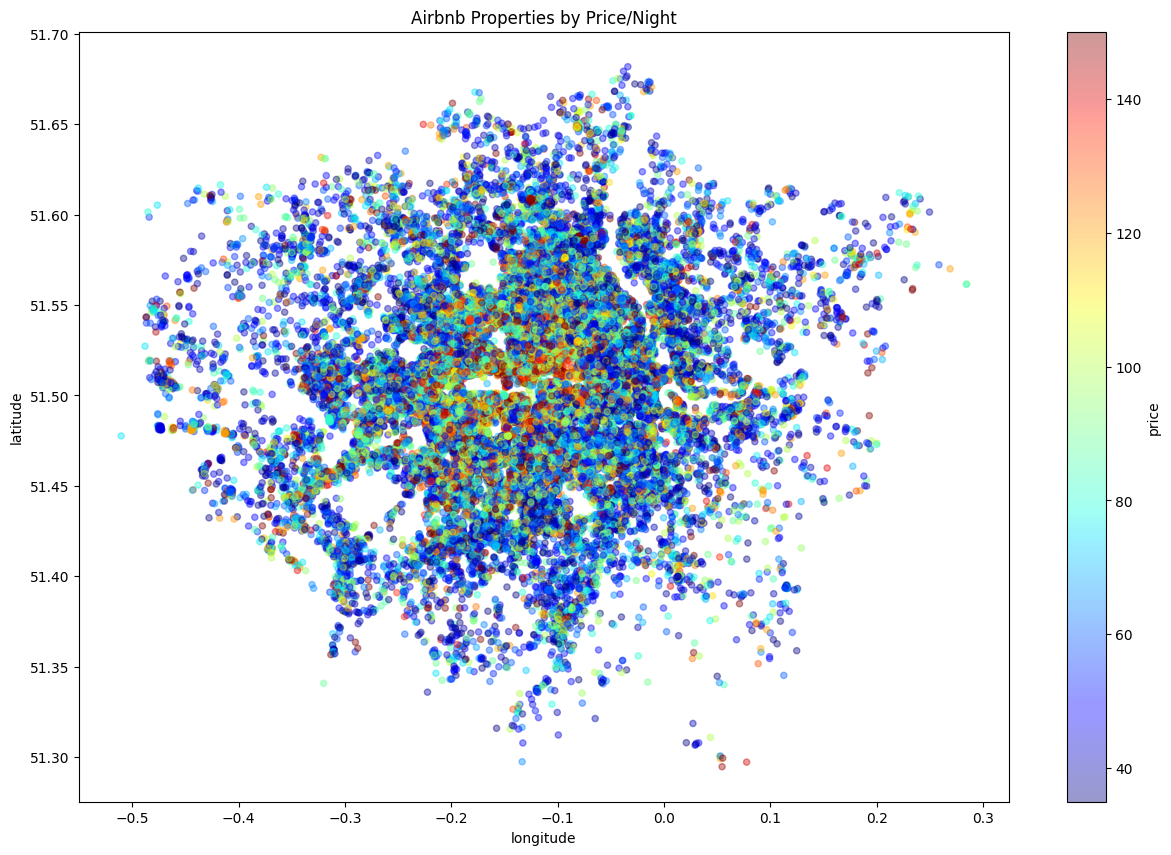

In [19]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=listing1.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties by Price/Night")
plt.show()

<Figure size 3000x2000 with 0 Axes>

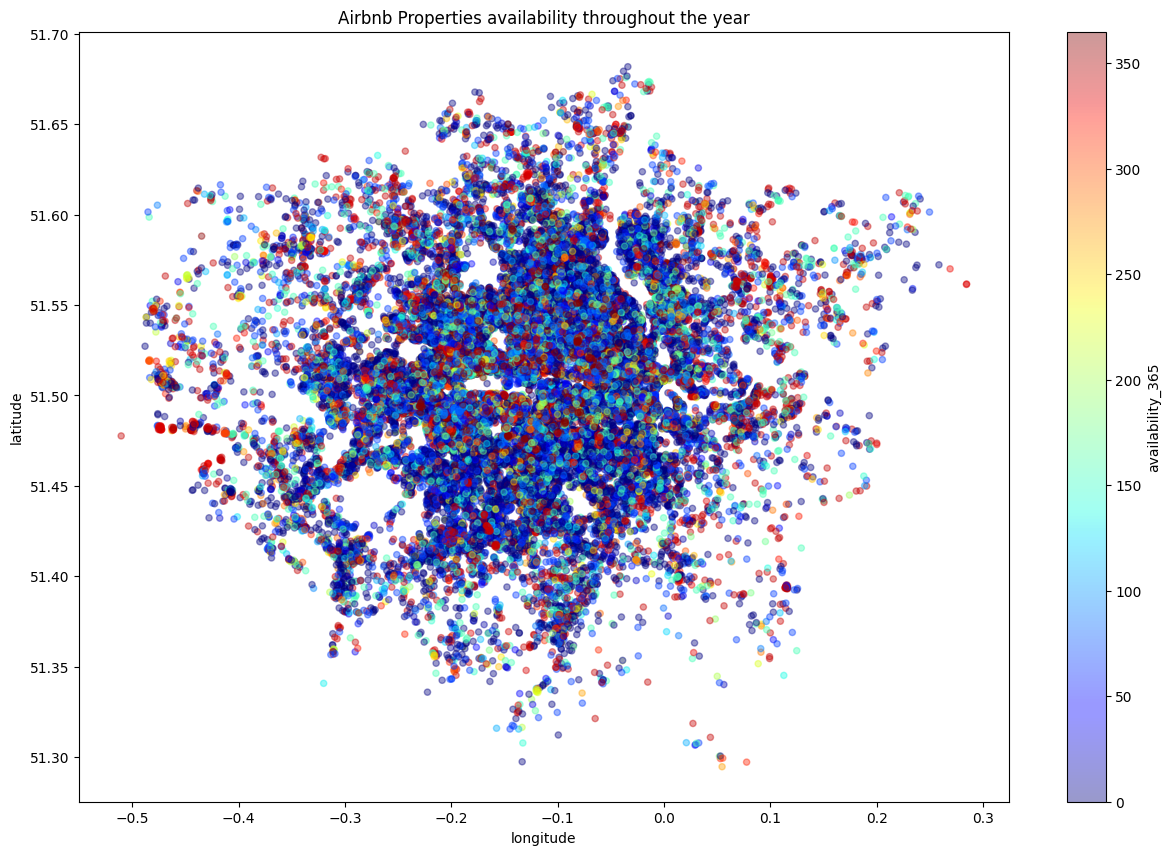

In [20]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=listing1.plot(kind='scatter', x='longitude', y='latitude', c='availability_365', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties availability throughout the year")
plt.show()

In [21]:
listing1['annual_income']=listing1['price']*(365-listing1['availability_365'])

<Figure size 3000x2000 with 0 Axes>

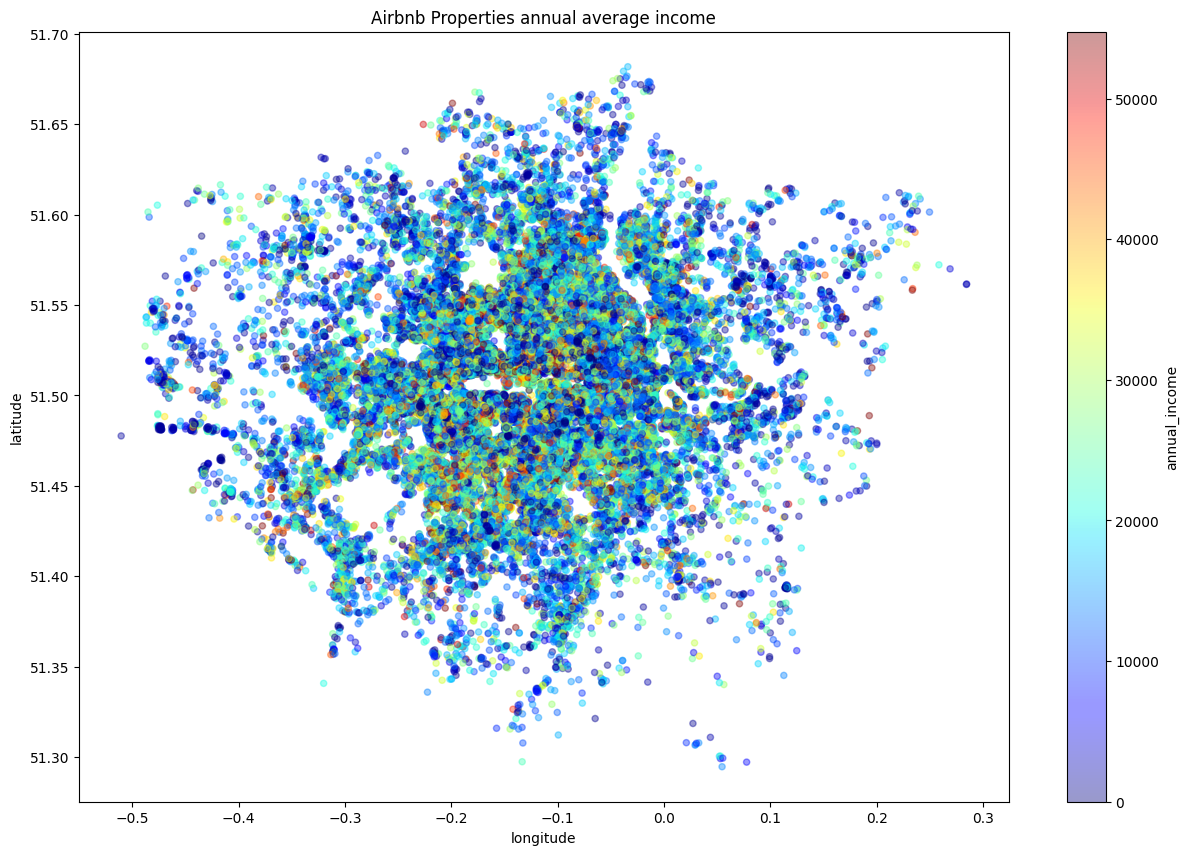

In [22]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=listing1.plot(kind='scatter', x='longitude', y='latitude', c='annual_income', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties annual average income")
plt.show()

In [23]:
# red_df=listing.groupby("neighbourhood").mean()
# red_df = red_df[["price","minimum_nights","reviews_per_month"]].reset_index()
inc=listing1.groupby('neighbourhood').sum().reset_index()
mark=listing1.groupby('neighbourhood').mean().reset_index()
inc['longitude']=mark['longitude']
inc['latitude']=mark['latitude']
# print(inc[['latitude','longitude','neighbourhood','annual_income']])
# inc[['latitude','longitude','neighbourhood','annual_income']].to_csv('Pred.csv')
inc.head()

C:\Users\cheri\AppData\Local\Temp/ipykernel_20656/1567191650.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inc=listing1.groupby('neighbourhood').sum().reset_index()
C:\Users\cheri\AppData\Local\Temp/ipykernel_20656/1567191650.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mark=listing1.groupby('neighbourhood').mean().reset_index()


neighbourhood           id       host_id   latitude  longitude  \
0  Barking and Dagenham   7560605896   38096928707  51.543165   0.116096   
1                Barnet  29850892054  121398123738  51.597288  -0.205790   
2                Bexley   4034147309   20694355072  51.470090   0.135255   
3                 Brent  44454905099  161832764312  51.546233  -0.234957   
4               Bromley  10761361273   43816680695  51.400927   0.005437   

    price  minimum_nights  number_of_reviews  reviews_per_month  \
0   16480             953               1700             118.77   
1   81711            6739              12943             603.27   
2   10158             589                865              56.86   
3  128475            5834              34388            1378.47   
4   29025            1670               4082             203.15   

   calculated_host_listings_count  availability_365  annual_income  
0                             539             37095        3461351  
1                           10135            155347       18639618  
2                             398             22930        2012055  
3                           17201            207705       32433453  
4                             932             55812        6795281

<Figure size 3000x2000 with 0 Axes>

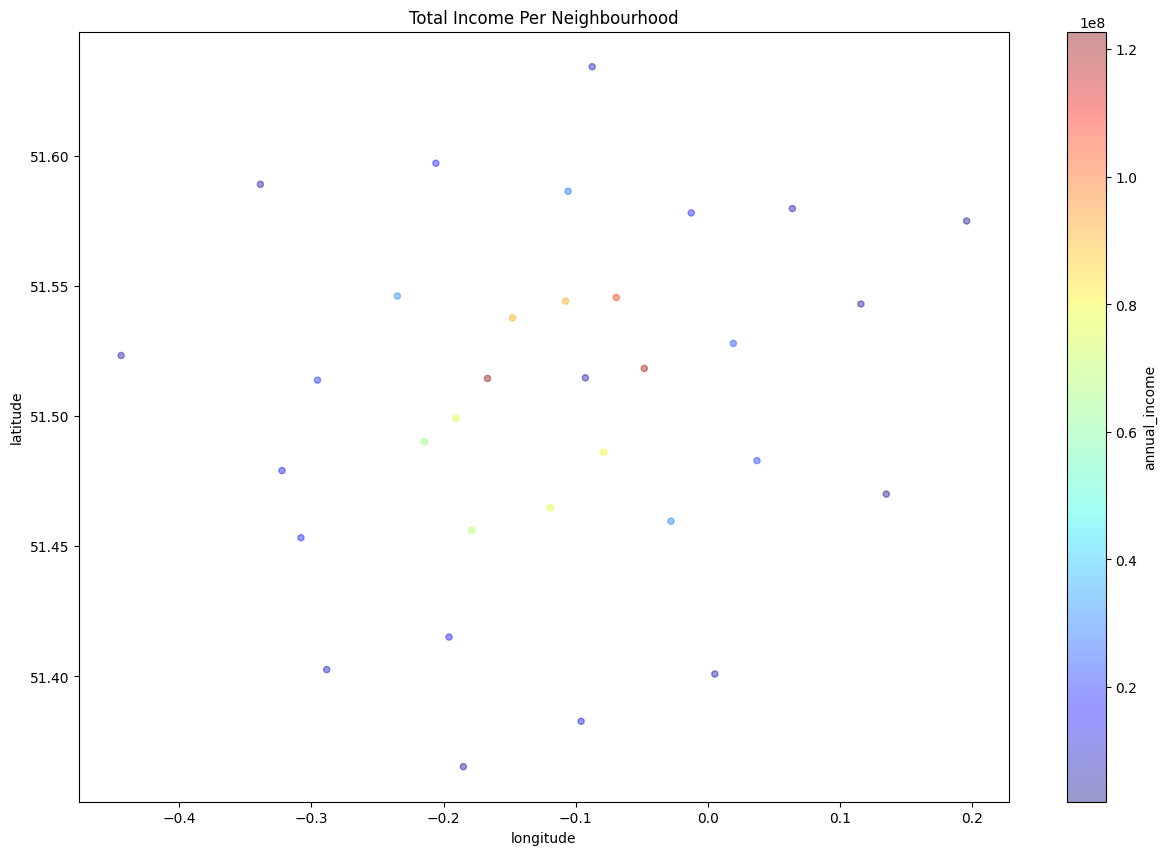

In [24]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=inc.plot(kind='scatter', x='longitude', y='latitude', c='annual_income', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Total Income Per Neighbourhood")
plt.show()

In [25]:
property_type_borough = listing1.groupby(["neighbourhood","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("neighbourhood","room_type","id")

C:\Users\cheri\AppData\Local\Temp/ipykernel_20656/3208790282.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  property_type_borough = property_type_borough.pivot("neighbourhood","room_type","id")


In [26]:
import numpy as np
property_type_borough=property_type_borough.replace(np.nan,0)
property_type_borough
property_type_borough['total']=property_type_borough['Entire home/apt']+property_type_borough['Private room']+property_type_borough['Shared room']+property_type_borough['Hotel room']

In [27]:
property_type_borough['total']=property_type_borough['total'].astype('float64')


In [28]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   33 non-null     object 
 1   id                              33 non-null     int64  
 2   host_id                         33 non-null     int64  
 3   latitude                        33 non-null     float64
 4   longitude                       33 non-null     float64
 5   price                           33 non-null     int64  
 6   minimum_nights                  33 non-null     int64  
 7   number_of_reviews               33 non-null     int64  
 8   reviews_per_month               33 non-null     float64
 9   calculated_host_listings_count  33 non-null     int64  
 10  availability_365                33 non-null     int64  
 11  annual_income                   33 non-null     int64  
dtypes: float64(3), int64(8), object(1)
mem

In [29]:
property_type_borough.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Barking and Dagenham to Westminster
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entire home/apt  33 non-null     float64
 1   Hotel room       33 non-null     float64
 2   Private room     33 non-null     float64
 3   Shared room      33 non-null     float64
 4   total            33 non-null     float64
dtypes: float64(5)
memory usage: 1.5+ KB


In [30]:
inc.reset_index()
inc['total']=property_type_borough['total']

In [31]:
inc[['latitude','longitude','neighbourhood','annual_income']].to_csv('Pred.csv')
property_type_borough.to_csv('rooms.csv')

In [32]:
pred=pd.read_csv('pred.csv')
rooms=pd.read_csv('rooms.csv')

In [33]:
pred['total']=rooms['total']

In [34]:
pred.head()

Unnamed: 0   latitude  longitude         neighbourhood  annual_income  \
0           0  51.543165   0.116096  Barking and Dagenham        3461351   
1           1  51.597288  -0.205790                Barnet       18639618   
2           2  51.470090   0.135255                Bexley        2012055   
3           3  51.546233  -0.234957                 Brent       32433453   
4           4  51.400927   0.005437               Bromley        6795281   

    total  
0   252.0  
1  1149.0  
2   148.0  
3  1783.0  
4   426.0

In [35]:
pred['annual_income']=pred['annual_income']/pred['total']

In [36]:
pred.to_csv('pred1.csv')

<Figure size 3000x2000 with 0 Axes>

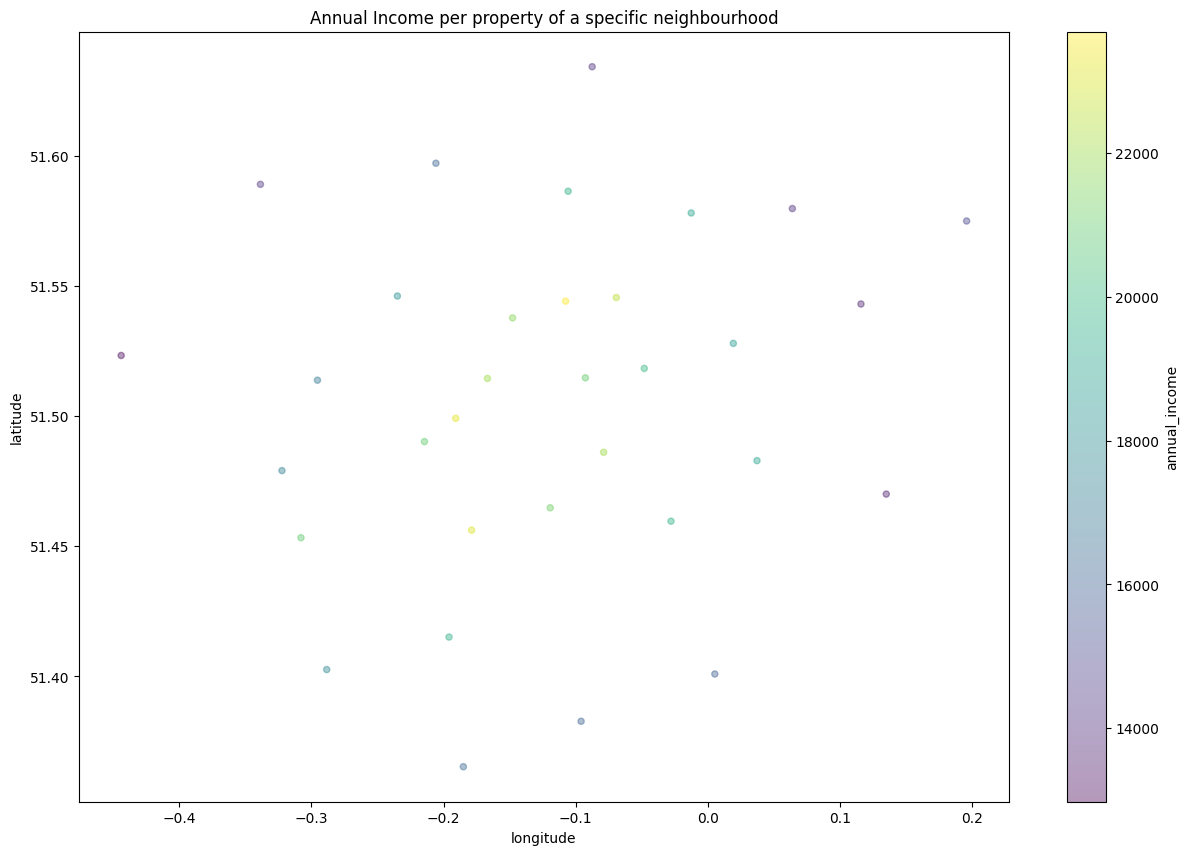

In [37]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=pred.plot(kind='scatter', x='longitude', y='latitude', c='annual_income', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Annual Income per property of a specific neighbourhood")
plt.show()

In [38]:
pred.describe()

Unnamed: 0   latitude  longitude  annual_income        total
count    33.00000  33.000000  33.000000      33.000000    33.000000
mean     16.00000  51.505429  -0.120840   18500.621949  1767.878788
std       9.66954   0.065941   0.146436    3183.731202  1703.250968
min       0.00000  51.365281  -0.444125   12976.910913   148.000000
25%       8.00000  51.464829  -0.205790   16106.488823   449.000000
50%      16.00000  51.514543  -0.107573   19039.689340  1149.000000
75%      24.00000  51.545658  -0.027749   20996.348148  3034.000000
max      32.00000  51.634382   0.196121   23690.628065  6007.000000

In [39]:
pred['annual_income_taxdeduc']=pred['annual_income']*0.0534
pred['annual_income_airbnbdeduc']=pred['annual_income']*0.03
pred['finl_income']=pred['annual_income']-pred['annual_income_taxdeduc']-pred['annual_income_airbnbdeduc']


In [40]:
pred.describe()

Unnamed: 0   latitude  longitude  annual_income        total  \
count    33.00000  33.000000  33.000000      33.000000    33.000000   
mean     16.00000  51.505429  -0.120840   18500.621949  1767.878788   
std       9.66954   0.065941   0.146436    3183.731202  1703.250968   
min       0.00000  51.365281  -0.444125   12976.910913   148.000000   
25%       8.00000  51.464829  -0.205790   16106.488823   449.000000   
50%      16.00000  51.514543  -0.107573   19039.689340  1149.000000   
75%      24.00000  51.545658  -0.027749   20996.348148  3034.000000   
max      32.00000  51.634382   0.196121   23690.628065  6007.000000   

       annual_income_taxdeduc  annual_income_airbnbdeduc   finl_income  
count               33.000000                  33.000000     33.000000  
mean               987.933212                 555.018658  16957.670079  
std                170.011246                  95.511936   2918.208020  
min                692.967043                 389.307327  11894.636543  
25%                860.086503                 483.194665  14763.207655  
50%               1016.719411                 571.190680  17451.779249  
75%               1121.204991                 629.890444  19245.252713  
max               1265.079539                 710.718842  21714.829684

In [41]:
pred.to_csv('pred2.csv')

In [42]:
listng=pd.read_csv('listings.csv')

In [43]:
listing.describe()

id       host_id      latitude     longitude         price  \
count  8.635800e+04  8.635800e+04  86358.000000  86358.000000  86358.000000   
mean   2.511516e+07  9.334733e+07     51.509916     -0.128245    129.610725   
std    1.238307e+07  9.543753e+07      0.046204      0.093286    289.484146   
min    1.391300e+04  4.775000e+03     51.294790     -0.510310      0.000000   
25%    1.553035e+07  1.636343e+07     51.485850     -0.188380     47.000000   
50%    2.573346e+07  5.013476e+07     51.514080     -0.126245     83.000000   
75%    3.654165e+07  1.522947e+08     51.537620     -0.069930    140.000000   
max    4.318679e+07  3.437914e+08     51.681690      0.284500  19985.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    86358.000000       86358.000000       64842.000000   
mean         4.474490          17.531277           0.963183   
std         19.151568          37.393948           1.177591   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.200000   
50%          2.000000           4.000000           0.560000   
75%          3.000000          17.000000           1.270000   
max       1125.000000         773.000000          22.690000   

       calculated_host_listings_count  availability_365  
count                    86358.000000      86358.000000  
mean                        20.987448        116.328898  
std                        100.232081        135.293902  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         63.000000  
75%                          5.000000        237.000000  
max                        928.000000        365.000000

In [44]:
ins=pd.read_excel('investment.xlsx')

In [45]:
ins.head()

Borough  Average   latitude  longitude
0  Barking and Dagenham   298620  51.542645   0.112094
1                Barnet   519611  51.596730  -0.206281
2                Bexley   336858  51.471405   0.137298
3                 Brent   474513  51.545745  -0.233753
4               Bromley   436460  51.401224   0.003821

In [46]:
pred.head()

Unnamed: 0   latitude  longitude         neighbourhood  annual_income  \
0           0  51.543165   0.116096  Barking and Dagenham   13735.519841   
1           1  51.597288  -0.205790                Barnet   16222.469974   
2           2  51.470090   0.135255                Bexley   13594.966216   
3           3  51.546233  -0.234957                 Brent   18190.383062   
4           4  51.400927   0.005437               Bromley   15951.363850   

    total  annual_income_taxdeduc  annual_income_airbnbdeduc   finl_income  
0   252.0              733.476760                 412.065595  12589.977487  
1  1149.0              866.279897                 486.674099  14869.515978  
2   148.0              725.971196                 407.848986  12461.146034  
3  1783.0              971.366456                 545.711492  16673.305115  
4   426.0              851.802830                 478.540915  14621.020105

In [47]:
ins['total']=pred['total']
ins['finl_income']=pred['finl_income']
ins.head()

Borough  Average   latitude  longitude   total   finl_income
0  Barking and Dagenham   298620  51.542645   0.112094   252.0  12589.977487
1                Barnet   519611  51.596730  -0.206281  1149.0  14869.515978
2                Bexley   336858  51.471405   0.137298   148.0  12461.146034
3                 Brent   474513  51.545745  -0.233753  1783.0  16673.305115
4               Bromley   436460  51.401224   0.003821   426.0  14621.020105

In [48]:
ins['returns']=ins['Average']/ins['finl_income']
ins.head()

Borough  Average   latitude  longitude   total   finl_income  \
0  Barking and Dagenham   298620  51.542645   0.112094   252.0  12589.977487   
1                Barnet   519611  51.596730  -0.206281  1149.0  14869.515978   
2                Bexley   336858  51.471405   0.137298   148.0  12461.146034   
3                 Brent   474513  51.545745  -0.233753  1783.0  16673.305115   
4               Bromley   436460  51.401224   0.003821   426.0  14621.020105   

     returns  
0  23.718867  
1  34.944715  
2  27.032666  
3  28.459444  
4  29.851542

In [49]:
ins.to_csv('returns.csv')

<Figure size 3000x2000 with 0 Axes>

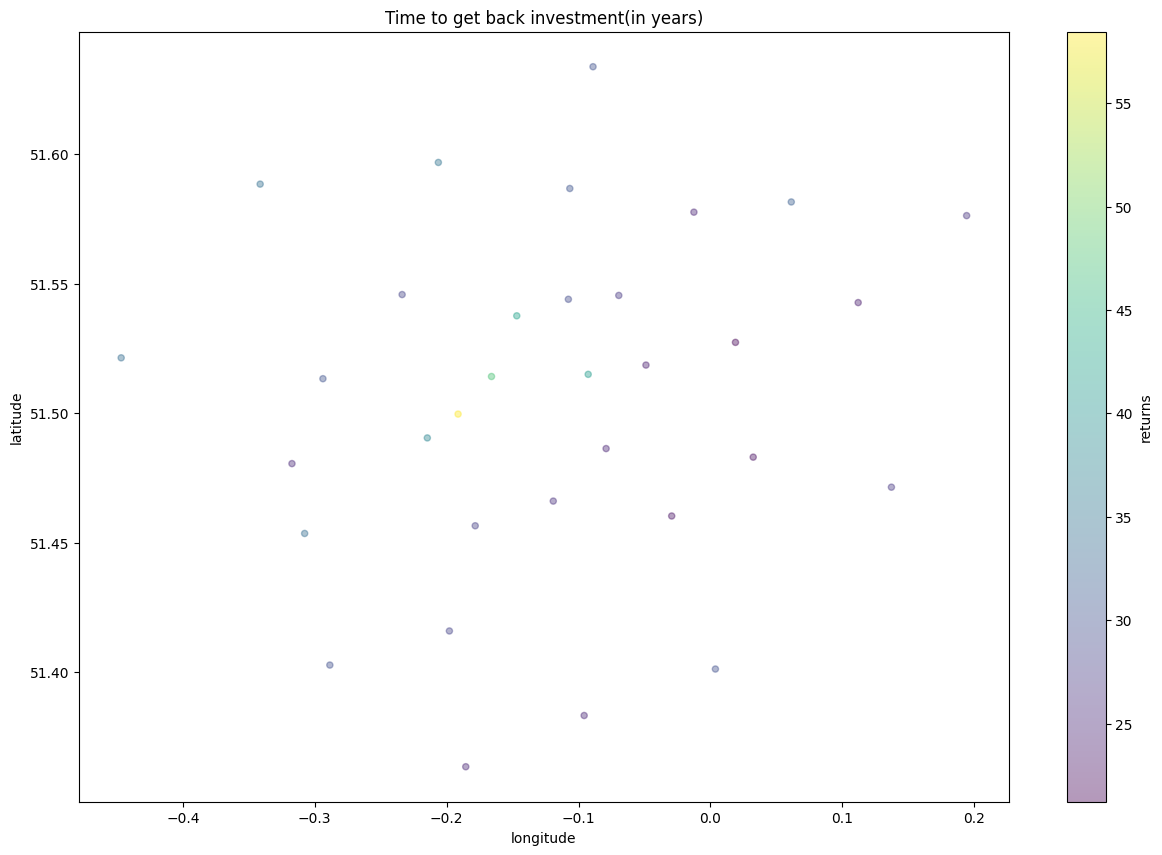

In [50]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=ins.plot(kind='scatter', x='longitude', y='latitude', c='returns', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Time to get back investment(in years)")
plt.show()

In [51]:
pred['neighbourhood']

0       Barking and Dagenham
1                     Barnet
2                     Bexley
3                      Brent
4                    Bromley
5                     Camden
6             City of London
7                    Croydon
8                     Ealing
9                    Enfield
10                 Greenwich
11                   Hackney
12    Hammersmith and Fulham
13                  Haringey
14                    Harrow
15                  Havering
16                Hillingdon
17                  Hounslow
18                 Islington
19    Kensington and Chelsea
20      Kingston upon Thames
21                   Lambeth
22                  Lewisham
23                    Merton
24                    Newham
25                 Redbridge
26      Richmond upon Thames
27                 Southwark
28                    Sutton
29             Tower Hamlets
30            Waltham Forest
31                Wandsworth
32               Westminster
Name: neighbourhood, dtype: object